<a href="https://colab.research.google.com/github/Amityadav9/NLP_Movies_SA/blob/main/My_model_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jun  8 15:04:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
from google.colab import files
movies_reviews = files.upload()

In [ ]:
movies_reviews = pd.read_csv('IMDB Dataset.csv')     # Reads the data from the pc

In [ ]:
movies_reviews.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
movies_reviews.info()          # Gives the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
movies_reviews.index                     # Shows numbers of rows

RangeIndex(start=0, stop=50000, step=1)

In [ ]:
movies_reviews.columns                  # Shows numbers off column

Index(['review', 'sentiment'], dtype='object')

In [ ]:
movies_reviews.isnull().values.any()            # checks if there is any null values in the data

False

In [ ]:
movies_reviews.shape

(50000, 2)

In [ ]:
movies_reviews['review'][3]                         ## shows the 3rd review from the dataframe


"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
movies_reviews['sentiment'][3]                      ## Shows the 3rd sentiment from the dataframe which is negative

'negative'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


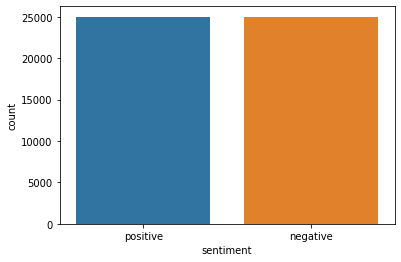

In [ ]:
import seaborn as sns                             ## plots the graph of sentimnets which shows equal positive and negative sentiments

sns.countplot(x='sentiment',data = movies_reviews)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
movies_reviews['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [ ]:
### Word Count

In [ ]:
movies_reviews['word_counts']=  movies_reviews['review'].apply(lambda x: len(str(x.split())))

In [ ]:
movies_reviews.head()

,review,sentiment,word_counts
0,One of the other reviewers has mentioned that ...,positive,2683
1,A wonderful little production. <br /><br />The...,positive,1485
2,I thought this was a wonderful way to spend ti...,positive,1425
3,Basically there's a family where a little boy ...,negative,1163
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,2008


In [ ]:
## PRE-PROCESSING

df = pd.DataFrame
df = movies_reviews
df['review'] = df['review'].apply(lambda x : x.lower())       ## Lower Case conversion
df.head()

,review,sentiment,word_counts
0,one reviewers mentioned watching oz episode ho...,positive,2683
1,wonderful little production br br filming tech...,positive,1485
2,thought wonderful way spend time hot summer we...,positive,1425
3,basically family little boy jake thinks zombie...,negative,1163
4,petter mattei love time money visually stunnin...,positive,2008


In [ ]:
 ###   Count and REMOVE EMAILS

import re

x = " hi mail me at at email@email.com aslo another@email.com"

## re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x)  this is to find any email in sentences

re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','',x)    ###  To remove the email

' hi mail me at at  aslo '

In [ ]:
df['emails'] = df['review'].apply(lambda x:re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x)) 
## Finds all the email

df['count_emails'] = df['emails'].apply(lambda x : len(x))   ### Counts and makes table
##df[df['count_emails']>0].head()            --->> shows the output here  


df['review']= df['review'].apply(lambda x:re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','',x) )
## Finally Removes the review here
##df[df['count_emails']>0].head()


In [ ]:
df.drop(['count_emails','emails'],axis=1, inplace=True)

In [ ]:
df.head()      #### REmoved emails and count columns

,review,sentiment,word_counts
0,one reviewers mentioned watching oz episode ho...,positive,2683
1,wonderful little production br br filming tech...,positive,1485
2,thought wonderful way spend time hot summer we...,positive,1425
3,basically family little boy jake thinks zombie...,negative,1163
4,petter mattei love time money visually stunnin...,positive,2008


In [ ]:
### Removes all the punctuation and special characters 

df['review']=df['review'].apply(lambda x: re.sub('[^a-zA-Z]+',' ',x))  

df.head()


,review,sentiment,word_counts
0,one reviewers mentioned watching oz episode ho...,positive,2683
1,wonderful little production br br filming tech...,positive,1485
2,thought wonderful way spend time hot summer we...,positive,1425
3,basically family little boy jake thinks zombie...,negative,1163
4,petter mattei love time money visually stunnin...,positive,2008


In [ ]:
###  REMOVE HTML TAGS 
from bs4 import BeautifulSoup

x = '<html><h2> thansk for  watching</html>'
BeautifulSoup(x,'lxml').get_text()

df['review']=df['review'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

In [ ]:
 # Single character removal

df['review']=df['review'].apply(lambda x:re.sub(r"\s+[a-zA-Z]\s+", ' ', x))

In [ ]:
### Removes multiple white spaces

df['review']=df['review'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [ ]:
df['review'][5]

'probably time favorite movie story selflessness sacrifice dedication noble cause preachy boring never gets old despite seen times last years paul lukas performance brings tears eyes bette davis one truly sympathetic roles delight kids grandma says like dressed midgets children makes fun watch mother slow awakening happening world roof believable startling dozen thumbs movie'

In [ ]:
### REMOVE STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
##  from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop = stopwords.words('english')

x = 'There are nothing that i can do, I just neeed to be consistent and work hard evry day and never give up'

## Tokens = word_tokenize(x)
res= ' '.join([word for word in x.split() if word not in stop])
print(res)



There nothing do, I neeed consistent work hard evry day never give


In [ ]:
## Removes all the stopwords
%%time


df['review']=df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


CPU times: user 11.7 s, sys: 0 ns, total: 11.7 s
Wall time: 11.7 s


In [ ]:
#X = []

#for sentence in df['review']:
 # X.append(sentence)



X = []
sentences = list(df['review'])
for sen in sentences:
    X.append((sen))

In [ ]:
y =  movies_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0 , y)))

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
### Splitting the data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [ ]:
##  Preparing the Embedding Layer
from keras.preprocessing.text import Tokenizer


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
### PADDING SEQUENCES
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = len(tokenizer.word_index)+1    # Adding 1 because of reserved 0 index


max_len = 120

X_train = pad_sequences(X_train,padding='post',maxlen=max_len)
X_test = pad_sequences(X_test,padding='post', maxlen=max_len)

In [ ]:
len(X_train[0])

120

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional,SpatialDropout1D

embedding_vector_len = 32

model = Sequential()

model.add(Embedding(vocab_size,embedding_vector_len,input_length=max_len))
#model.add(SpatialDropout1D(0.25))
model.add(Bidirectional(LSTM(64,return_sequences=True)))    ###   dropout=0.5,recurrent_dropout=0.5,
#model.add(Dropout(0.2))     #Dropouts are added in-between layers and also on the LSTM layer to avoid overfitting
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 32)           2901408   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 120, 128)          49664     
_________________________________________________________________
dense_15 (Dense)             (None, 120, 32)           4128      
_________________________________________________________________
dense_16 (Dense)             (None, 120, 1)            33        
Total params: 2,955,233
Trainable params: 2,955,233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,batch_size=128,epochs =5,validation_split=0.2,verbose=1)

Epoch 1/5
250/250 [==============================] - 23s 92ms/step - loss: 0.3913 - accuracy: 0.8140 - val_loss: 0.3058 - val_accuracy: 0.8734
Epoch 2/5
250/250 [==============================] - 22s 90ms/step - loss: 0.2589 - accuracy: 0.8994 - val_loss: 0.3154 - val_accuracy: 0.8668
Epoch 3/5
250/250 [==============================] - 22s 90ms/step - loss: 0.2311 - accuracy: 0.9125 - val_loss: 0.3196 - val_accuracy: 0.8728
Epoch 4/5
250/250 [==============================] - 22s 90ms/step - loss: 0.2151 - accuracy: 0.9202 - val_loss: 0.3227 - val_accuracy: 0.8713
Epoch 5/5
250/250 [==============================] - 22s 88ms/step - loss: 0.1951 - accuracy: 0.9297 - val_loss: 0.3461 - val_accuracy: 0.8704


In [ ]:
score = model.evaluate(X_test,y_test,verbose=1)

313/313 [==============================] - 6s 20ms/step - loss: 0.3350 - accuracy: 0.8734


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3424912989139557
Test Accuracy: 0.8700365424156189


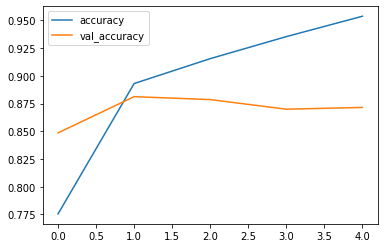

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

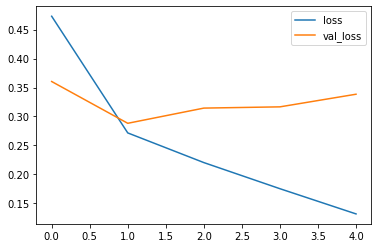

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


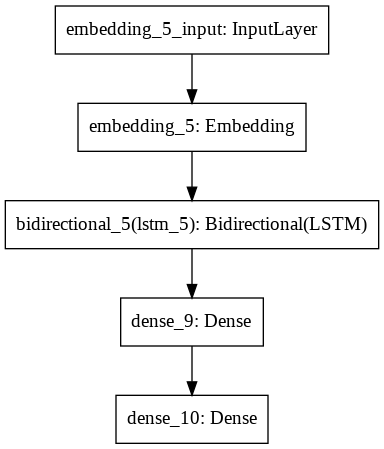

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file = 'model.png')

In [ ]:
model.save('/tmp/imdb_sentiment_analysis.hdf5')

In [ ]:
review = ['like it']
seq = tokenizer.texts_to_sequences(review)

In [ ]:
padded = pad_sequences(seq,maxlen=max_len,padding='post')

In [ ]:
instance = tokenizer.texts_to_sequences(review)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=max_len)

model.predict(instance)

array([[[0.4894681 ],
        [0.4975551 ],
        [0.49880576],
        [0.49965453],
        [0.5004136 ],
        [0.5012234 ],
        [0.50213844],
        [0.5031706 ],
        [0.5043115 ],
        [0.5055441 ],
        [0.5068491 ],
        [0.50820756],
        [0.5096027 ],
        [0.5110206 ],
        [0.51245004],
        [0.51388234],
        [0.51531136],
        [0.51673263],
        [0.51814353],
        [0.5195426 ],
        [0.52092934],
        [0.5223041 ],
        [0.5236676 ],
        [0.5250211 ],
        [0.5263658 ],
        [0.5277035 ],
        [0.52903557],
        [0.53036356],
        [0.53168917],
        [0.5330137 ],
        [0.53433853],
        [0.53566486],
        [0.53699404],
        [0.5383269 ],
        [0.53966457],
        [0.5410079 ],
        [0.5423575 ],
        [0.5437143 ],
        [0.5450788 ],
        [0.5464517 ],
        [0.5478333 ],
        [0.54922426],
        [0.5506249 ],
        [0.55203557],
        [0.55342066],
        [0

In [ ]:
output = tokenizer.texts_to_sequences(code)

flat_list = []
for sublist in output:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

output = pad_sequences(flat_list, padding='post', maxlen=max_len)

model.predict(output)

In [ ]:
def pad_to_size(vec, size):
     zeros = [0] * (size - len (vec))
     vec.extend(zeros)
     return vec

In [ ]:
def predict_fn(pred_text):
  encoded_pred_text = tokenizer.texts_to_sequences(pred_text)
  #print(encoded_pred_text)
  encoded_pred_text = pad_sequences(encoded_pred_text, 5)
  #print(encoded_pred_text )
 # encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = model.predict(encoded_pred_text ,0)

  return (predictions)

In [ ]:
pred_text = ('This movies was pathetic.')
predictions = predict_fn(pred_text)
print(predictions)

[[[0.5775396 ]
  [0.57397604]
  [0.5681248 ]
  [0.5605864 ]
  [0.53341454]]

 [[0.07746395]
  [0.08868797]
  [0.10904241]
  [0.15736389]
  [0.18631986]]

 [[0.7586936 ]
  [0.75477684]
  [0.73914444]
  [0.7039057 ]
  [0.6528564 ]]

 [[0.29769343]
  [0.35843876]
  [0.4011015 ]
  [0.41080916]
  [0.59087646]]

 [[0.35491025]
  [0.3766395 ]
  [0.39012054]
  [0.41024   ]
  [0.4336054 ]]

 [[0.35815746]
  [0.36289662]
  [0.3650642 ]
  [0.3669443 ]
  [0.39707857]]

 [[0.21379331]
  [0.2436632 ]
  [0.29440078]
  [0.3511041 ]
  [0.4451435 ]]

 [[0.34119284]
  [0.39945498]
  [0.43357214]
  [0.46657842]
  [0.4488796 ]]

 [[0.7586936 ]
  [0.75477684]
  [0.73914444]
  [0.7039057 ]
  [0.6528564 ]]

 [[0.46301636]
  [0.45510024]
  [0.44873902]
  [0.4558454 ]
  [0.46935463]]

 [[0.29769343]
  [0.35843876]
  [0.4011015 ]
  [0.41080916]
  [0.59087646]]

 [[0.35491025]
  [0.3766395 ]
  [0.39012054]
  [0.41024   ]
  [0.4336054 ]]

 [[0.7474171 ]
  [0.74121314]
  [0.72284263]
  [0.6878497 ]
  [0.6374895 ]]
